# WeatherPy
----

### Analysis
* There is an observable correlation between latitude and max temperature: the farther away a city is from the equator (0 latitude), the higher temperatures seem to be.
* There is no observable correlation between latitude and humidity.
* There is no observable correlation between latitude and windspeed.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import pprint
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [89]:
# Config info
url = "http://api.openweathermap.org/data/2.5/weather?"
# city = cities[0]

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city + '&' + 'units=imperial'

# Get weather data and test response for single city
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
pprint(weather_json)
print('\n')

cloudiness = weather_json['clouds']['all']
country = weather_json['sys']['country']
date = weather_json['dt']
lat = weather_json['coord']['lat']
lng = weather_json['coord']['lon']
maxTemp = weather_json ['main']['temp_max']
windSpeed = weather_json['wind']['speed']
humidity = weather_json['main']['humidity']

print(cloudiness)
print(country)
print(date)
print(lat)
print(lng)
print(maxTemp)
print(windSpeed)
print(humidity)
# try
# except:
#     print('City not found. Skipping...')

{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': -34.42, 'lon': 19.24},
 'dt': 1561128599,
 'id': 3366880,
 'main': {'humidity': 59,
          'pressure': 1008,
          'temp': 59.07,
          'temp_max': 64,
          'temp_min': 55},
 'name': 'Hermanus',
 'rain': {'3h': 1.438},
 'sys': {'country': 'ZA',
         'id': 2006131,
         'message': 0.0061,
         'sunrise': 1561096155,
         'sunset': 1561131609,
         'type': 3},
 'timezone': 7200,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 293, 'gust': 10.28, 'speed': 15.01}}


33
ZA
1561128599
-34.42
19.24
64
15.01
59


In [93]:
# Create a dataframe to hold values
city_weather = pd.DataFrame(cities, columns=['City'])
city_weather[['Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]=pd.DataFrame([['','','','','','','','']], index=city_weather.index)

# Loop through city list to check for responses and assign values to dataframe
print('Beginning Data Retrieval')
print('---------------------------')
for index,row in city_weather.iterrows():
    city = row['City']
    try:
        # Build query URL
        query_url = url + "appid=" + api_key + "&q=" + city + '&' + 'units=imperial'
        
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # get weather characteristics
        cloudiness = weather_json['clouds']['all']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        maxTemp = weather_json ['main']['temp_max']
        windSpeed = weather_json['wind']['speed']
        humidity = weather_json['main']['humidity']
        
        # assign weather characteristics to data frame
        city_weather.loc[index,'Cloudiness'] = cloudiness
        city_weather.loc[index,'Country'] = country
        city_weather.loc[index,'Date'] = date
        city_weather.loc[index,'Humidity'] = humidity
        city_weather.loc[index,'Lat'] = lat
        city_weather.loc[index,'Lng'] = lng
        city_weather.loc[index,'Max Temp'] = maxTemp
        city_weather.loc[index,'Wind Speed'] = windSpeed

        print(f'Processing Record {index} of Set | {city}')
    except (KeyError, IndexError):
        print('City not found. Skipping...')

print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginning Data Retrieval
---------------------------
Processing Record 0 of Set | broome
Processing Record 1 of Set | atuona
Processing Record 2 of Set | barrow
Processing Record 3 of Set | tasiilaq
Processing Record 4 of Set | rikitea
Processing Record 5 of Set | nikolskoye
Processing Record 6 of Set | kayes
Processing Record 7 of Set | ushuaia
Processing Record 8 of Set | iquique
Processing Record 9 of Set | quang ngai
Processing Record 10 of Set | srednekolymsk
Processing Record 11 of Set | albany
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set | luohe
City not found. Skipping...
Processing Record 16 of Set | constitucion
Processing Record 17 of Set | busselton
Processing Record 18 of Set | smithers
Processing Record 19 of Set | mataura
Processing Record 20 of Set | whitehorse
Processing Record 21 of Set | punta arenas
Processing Record 22 of Set | yadgir
Processing Record 23 of Set | cabedelo
Processing Record 24 of Set | magistralnyy
Processing 

Processing Record 212 of Set | hermiston
Processing Record 213 of Set | adrar
City not found. Skipping...
Processing Record 215 of Set | kruisfontein
Processing Record 216 of Set | diapaga
Processing Record 217 of Set | bitung
Processing Record 218 of Set | kamenka
Processing Record 219 of Set | victoria
Processing Record 220 of Set | chenzhou
Processing Record 221 of Set | leh
Processing Record 222 of Set | lavrentiya
Processing Record 223 of Set | jalu
City not found. Skipping...
Processing Record 225 of Set | port elizabeth
Processing Record 226 of Set | coquimbo
City not found. Skipping...
Processing Record 228 of Set | yen bai
Processing Record 229 of Set | awjilah
City not found. Skipping...
Processing Record 231 of Set | marsabit
City not found. Skipping...
Processing Record 233 of Set | cidreira
Processing Record 234 of Set | jamkhed
Processing Record 235 of Set | inzer
Processing Record 236 of Set | hualmay
Processing Record 237 of Set | cockburn town
Processing Record 238 of 

Processing Record 422 of Set | darien
Processing Record 423 of Set | yuzhnyy
Processing Record 424 of Set | rantauprapat
Processing Record 425 of Set | hamilton
Processing Record 426 of Set | merke
City not found. Skipping...
Processing Record 428 of Set | bansi
Processing Record 429 of Set | southbridge
Processing Record 430 of Set | aripuana
Processing Record 431 of Set | trat
Processing Record 432 of Set | solikamsk
Processing Record 433 of Set | gergebil
Processing Record 434 of Set | sobolevo
Processing Record 435 of Set | corinto
Processing Record 436 of Set | mahajanga
Processing Record 437 of Set | zolochiv
Processing Record 438 of Set | hit
Processing Record 439 of Set | recreio
Processing Record 440 of Set | sulangan
Processing Record 441 of Set | mayo
Processing Record 442 of Set | weligama
Processing Record 443 of Set | yumen
Processing Record 444 of Set | morehead
Processing Record 445 of Set | kang
Processing Record 446 of Set | dalvik
Processing Record 447 of Set | rolla

In [94]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,broome,40,GB,1561128981,52,52.47,1.45,69.01,8.05
1,atuona,11,PF,1561128982,76,-9.8,-139.03,80.33,17.02
2,barrow,100,AR,1561128982,70,-38.31,-60.23,55.31,15.77
3,tasiilaq,90,GL,1561128982,86,65.61,-37.64,41,4.7
4,rikitea,100,PF,1561128982,79,-23.12,-134.97,74.21,25.66


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
# Export city data into a csv
city_weather.to_csv(output_data_file)

In [108]:
# replace empty values with NaN
city_weather['Cloudiness'].replace('', np.nan, inplace=True)
# Remove rows with no data
city_weather = city_weather.dropna()

In [109]:
city_weather.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [100]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,broome,40,GB,1561128981,52,52.47,1.45,69.01,8.05
1,atuona,11,PF,1561128982,76,-9.8,-139.03,80.33,17.02
2,barrow,100,AR,1561128982,70,-38.31,-60.23,55.31,15.77
3,tasiilaq,90,GL,1561128982,86,65.61,-37.64,41,4.7
4,rikitea,100,PF,1561128982,79,-23.12,-134.97,74.21,25.66


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [146]:
# Get Current Date Stamp
from datetime import datetime
currentDate = datetime.now().date().strftime('%m/%d/%y')

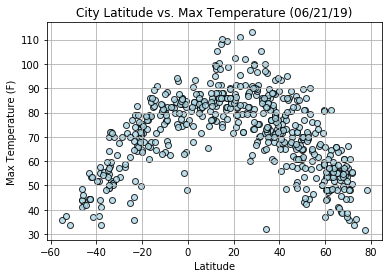

In [156]:
plt.scatter(city_weather.Lat,city_weather['Max Temp'],edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({currentDate})')
# Save and show plot
plt.savefig('Images/City Latitude vs. Max Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

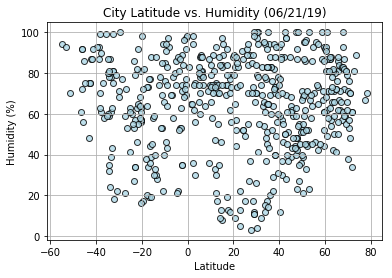

In [157]:
plt.scatter(city_weather.Lat,city_weather.Humidity,edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({currentDate})')
# Save and show plot
plt.savefig('Images/City Latitude vs. Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

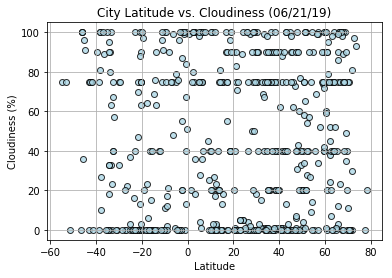

In [158]:
plt.scatter(city_weather.Lat,city_weather.Cloudiness,edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({currentDate})')
# Save and show plot
plt.savefig('Images/City Latitude vs. Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

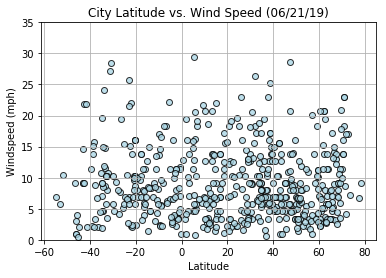

In [159]:
plt.scatter(city_weather.Lat,city_weather['Wind Speed'],edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.ylim(0,35)
plt.title(f'City Latitude vs. Wind Speed ({currentDate})')
# Save and show plot
plt.savefig('Images/City Latitude vs. Wind Speed.png')
plt.show()